In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

In [12]:
import re
import json

test_details_pat = re.compile(r'(?P<name>.*?)-(reps-)?(?P<reps>\d+)(-reps)?-(concurrent-)?(?P<concurrency>\d+)(-concurrent)?.json')
def load_data():
    data = []
    for folder in (f for f in os.scandir("../results") if os.path.isdir(f)):
        language = folder.name
        for file in os.scandir(folder.path):
            test_details = test_details_pat.match(file.name)
            if test_details is None:
                print(file.name)
                continue
            test_details.group("name")
            with open(file.path, "r") as f:
                results = json.load(f)
            data.append({
                "language": language,
                "test_name": test_details.group("name"),
                "test_reps": int(test_details.group("reps")),
                "test_concurrency": float(test_details.group("concurrency")),
                **results
            })
            
    return pd.DataFrame.from_dict(data)

In [13]:
df = load_data()
df = df[df["language"] != "rust-single-threaded"][df["language"] != "rust"]

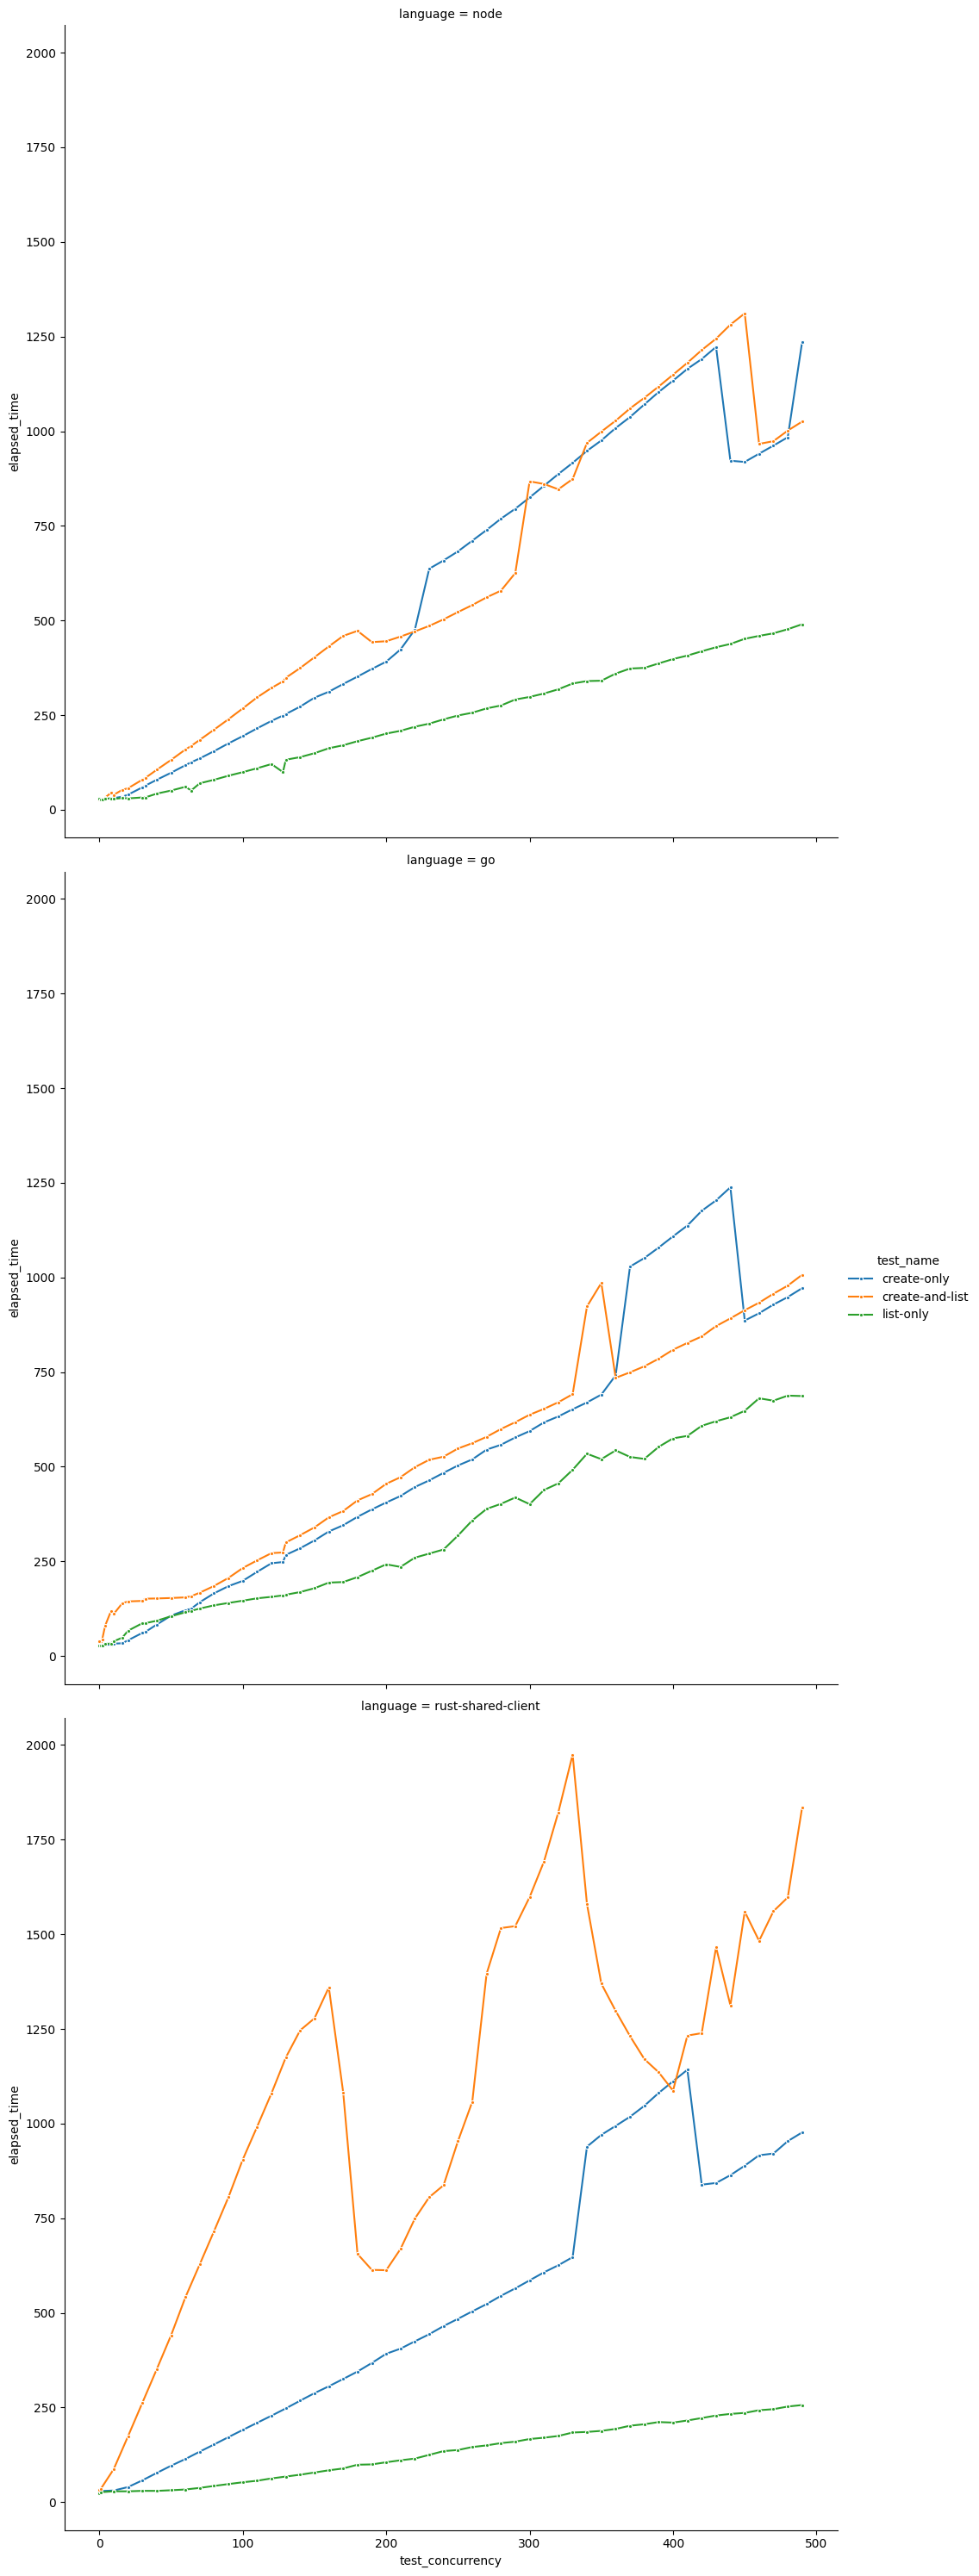

In [14]:
#data = df[df["language"]=="node"].sort_values(by='test_concurrency')
g = sns.FacetGrid(df, col="language", hue="test_name", height=10, col_wrap=1, legend_out=True)
g.map(sns.lineplot, 'test_concurrency', 'elapsed_time', marker=".", sort=True)
g.add_legend()
#graph = sns.lineplot(x='test_concurrency', y='elapsed_time', data=data, hue='test_name', marker=".", sort=False)


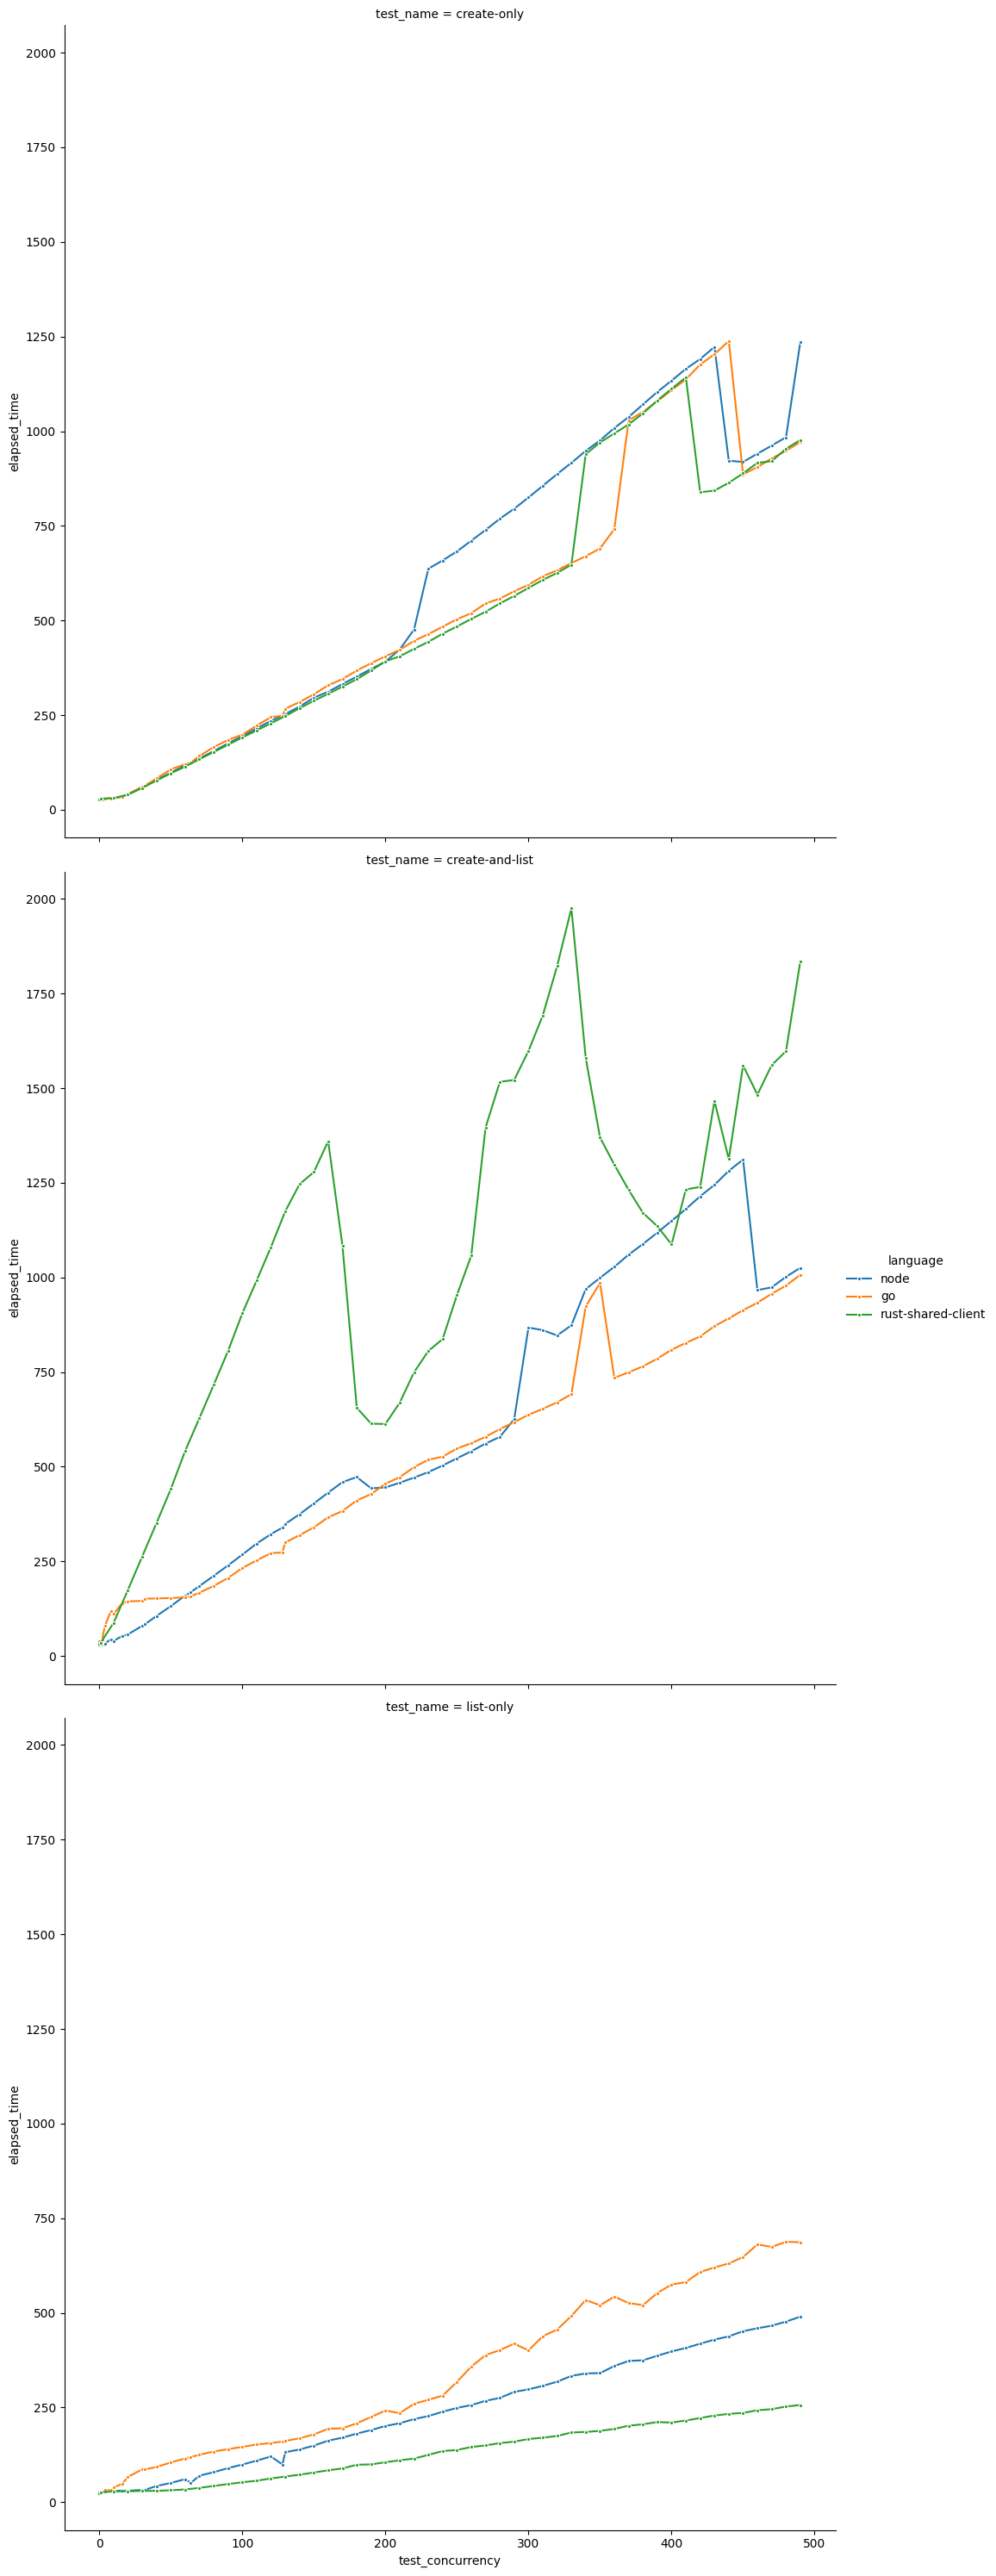

In [15]:
g = sns.FacetGrid(df, col="test_name", hue="language", height=10, col_wrap=1, legend_out=True)
g.map(sns.lineplot, 'test_concurrency', 'elapsed_time', marker=".", sort=True)
g.add_legend()

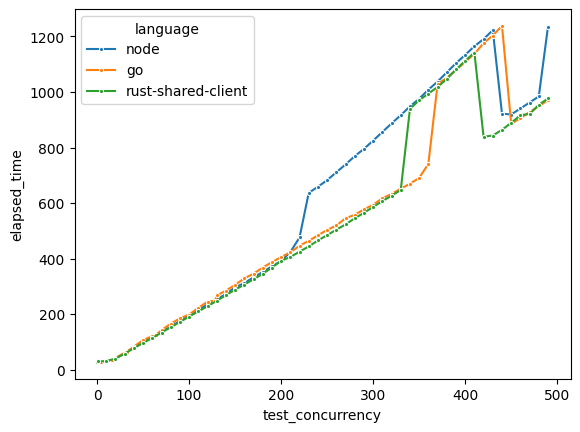

In [32]:
for test in ["create-only"]:
    data = df[df["test_name"] == test]
    graph1 = sns.lineplot(x='test_concurrency', y='elapsed_time', data=data, hue='language', marker=".")

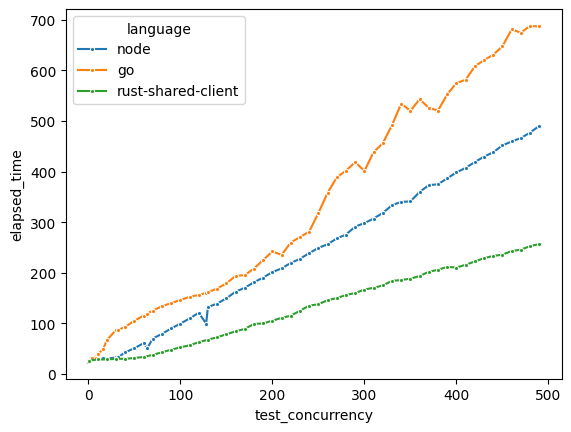

In [30]:
for test in ["list-only"]:
    data = df[df["test_name"] == test]
    graph2 = sns.lineplot(x='test_concurrency', y='elapsed_time', data=data, hue='language', marker=".")

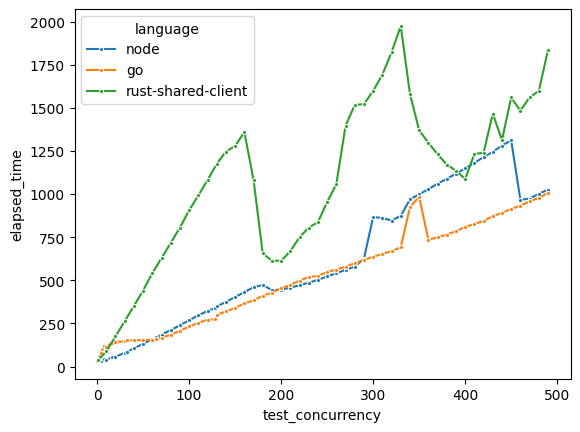

In [27]:
for test in ["create-and-list"]:
    data = df[df["test_name"] == test]
    graph3 = sns.lineplot(x='test_concurrency', y='elapsed_time', data=data, hue='language', marker=".")